# Exercício de Programação 4

<font color="red">**Prazo de submissão: 23:55 do dia 06.08.2021** </font>

2021.1 Álgebra Linear Computacional - DCC - UFMG

Erickson - Fabricio

Instruções:
* Antes de submeter suas soluções, certifique-se de que tudo roda como esperado. Primeiro, **reinicie o kernel** no menu, selecione Kernel $\rightarrow$ Restart e então execute **todas as células** (no menu, Cell $ \rightarrow $ Run All)
* Apenas o arquivo .ipynb deve ser submetido. Ele não deve ser compactado.
* Não deixe de preencher seu nome e número de matrícula na célula a seguir

**Nome do aluno:** Flavio Marcilio de Oliveira

## Introdução
Esse EP será dividido em 3 partes:
1. PCA
2. Regressão Linear Simples
3. Regressão Múltipla

Os conceitos cobrados aqui são discutidos nas aulas que abrangem o conteúdo de cada parte e elas devem ser a principal fonte de consulta para suas soluções.

Para as três partes, iremos trabalhar com um dataset (já disponível aqui no código) que contém os preços de imóveis do [Condado de King](https://pt.wikipedia.org/wiki/Condado_de_King_(Washington)) (Washington, EUA). O objetivo desse exercício é utilizar das técnicas aprendidas em aula para prever os preços imobiliários do condado através das características dos imóveis.

In [1]:
# ATENÇÃO: Não editar esta célula

############### Write code below ##################
import numpy as np
data = np.array([[2.2190e+05, 3.0000e+00, 1.0000e+00, 1.1800e+03, 5.6500e+03,
        1.0000e+00, 3.0000e+00, 7.0000e+00, 1.1800e+03, 1.9550e+03,
        1.3400e+03, 5.6500e+03],
       [5.3800e+05, 3.0000e+00, 2.2500e+00, 2.5700e+03, 7.2420e+03,
        2.0000e+00, 3.0000e+00, 7.0000e+00, 2.1700e+03, 1.9510e+03,
        1.6900e+03, 7.6390e+03],
       [1.8000e+05, 2.0000e+00, 1.0000e+00, 7.7000e+02, 1.0000e+04,
        1.0000e+00, 3.0000e+00, 6.0000e+00, 7.7000e+02, 1.9330e+03,
        2.7200e+03, 8.0620e+03],
       [6.0400e+05, 4.0000e+00, 3.0000e+00, 1.9600e+03, 5.0000e+03,
        1.0000e+00, 5.0000e+00, 7.0000e+00, 1.0500e+03, 1.9650e+03,
        1.3600e+03, 5.0000e+03],
       [5.1000e+05, 3.0000e+00, 2.0000e+00, 1.6800e+03, 8.0800e+03,
        1.0000e+00, 3.0000e+00, 8.0000e+00, 1.6800e+03, 1.9870e+03,
        1.8000e+03, 7.5030e+03],
       [2.5750e+05, 3.0000e+00, 2.2500e+00, 1.7150e+03, 6.8190e+03,
        2.0000e+00, 3.0000e+00, 7.0000e+00, 1.7150e+03, 1.9950e+03,
        2.2380e+03, 6.8190e+03],
       [2.9185e+05, 3.0000e+00, 1.5000e+00, 1.0600e+03, 9.7110e+03,
        1.0000e+00, 3.0000e+00, 7.0000e+00, 1.0600e+03, 1.9630e+03,
        1.6500e+03, 9.7110e+03],
       [2.2950e+05, 3.0000e+00, 1.0000e+00, 1.7800e+03, 7.4700e+03,
        1.0000e+00, 3.0000e+00, 7.0000e+00, 1.0500e+03, 1.9600e+03,
        1.7800e+03, 8.1130e+03],
       [3.2300e+05, 3.0000e+00, 2.5000e+00, 1.8900e+03, 6.5600e+03,
        2.0000e+00, 3.0000e+00, 7.0000e+00, 1.8900e+03, 2.0030e+03,
        2.3900e+03, 7.5700e+03],
       [6.6250e+05, 3.0000e+00, 2.5000e+00, 3.5600e+03, 9.7960e+03,
        1.0000e+00, 3.0000e+00, 8.0000e+00, 1.8600e+03, 1.9650e+03,
        2.2100e+03, 8.9250e+03],
       [4.6800e+05, 2.0000e+00, 1.0000e+00, 1.1600e+03, 6.0000e+03,
        1.0000e+00, 4.0000e+00, 7.0000e+00, 8.6000e+02, 1.9420e+03,
        1.3300e+03, 6.0000e+03],
       [3.1000e+05, 3.0000e+00, 1.0000e+00, 1.4300e+03, 1.9901e+04,
        1.5000e+00, 4.0000e+00, 7.0000e+00, 1.4300e+03, 1.9270e+03,
        1.7800e+03, 1.2697e+04],
       [4.0000e+05, 3.0000e+00, 1.7500e+00, 1.3700e+03, 9.6800e+03,
        1.0000e+00, 4.0000e+00, 7.0000e+00, 1.3700e+03, 1.9770e+03,
        1.3700e+03, 1.0208e+04],
       [5.3000e+05, 5.0000e+00, 2.0000e+00, 1.8100e+03, 4.8500e+03,
        1.5000e+00, 3.0000e+00, 7.0000e+00, 1.8100e+03, 1.9000e+03,
        1.3600e+03, 4.8500e+03],
       [6.5000e+05, 4.0000e+00, 3.0000e+00, 2.9500e+03, 5.0000e+03,
        2.0000e+00, 3.0000e+00, 9.0000e+00, 1.9800e+03, 1.9790e+03,
        2.1400e+03, 4.0000e+03],
       [3.9500e+05, 3.0000e+00, 2.0000e+00, 1.8900e+03, 1.4040e+04,
        2.0000e+00, 3.0000e+00, 7.0000e+00, 1.8900e+03, 1.9940e+03,
        1.8900e+03, 1.4018e+04],
       [4.8500e+05, 4.0000e+00, 1.0000e+00, 1.6000e+03, 4.3000e+03,
        1.5000e+00, 4.0000e+00, 7.0000e+00, 1.6000e+03, 1.9160e+03,
        1.6100e+03, 4.3000e+03],
       [1.8900e+05, 2.0000e+00, 1.0000e+00, 1.2000e+03, 9.8500e+03,
        1.0000e+00, 4.0000e+00, 7.0000e+00, 1.2000e+03, 1.9210e+03,
        1.0600e+03, 5.0950e+03],
       [2.3000e+05, 3.0000e+00, 1.0000e+00, 1.2500e+03, 9.7740e+03,
        1.0000e+00, 4.0000e+00, 7.0000e+00, 1.2500e+03, 1.9690e+03,
        1.2800e+03, 8.8500e+03],
       [3.8500e+05, 4.0000e+00, 1.7500e+00, 1.6200e+03, 4.9800e+03,
        1.0000e+00, 4.0000e+00, 7.0000e+00, 8.6000e+02, 1.9470e+03,
        1.4000e+03, 4.9800e+03],
       [2.8500e+05, 5.0000e+00, 2.5000e+00, 2.2700e+03, 6.3000e+03,
        2.0000e+00, 3.0000e+00, 8.0000e+00, 2.2700e+03, 1.9950e+03,
        2.2400e+03, 7.0050e+03],
       [2.5270e+05, 2.0000e+00, 1.5000e+00, 1.0700e+03, 9.6430e+03,
        1.0000e+00, 3.0000e+00, 7.0000e+00, 1.0700e+03, 1.9850e+03,
        1.2200e+03, 8.3860e+03],
       [3.2900e+05, 3.0000e+00, 2.2500e+00, 2.4500e+03, 6.5000e+03,
        2.0000e+00, 4.0000e+00, 8.0000e+00, 2.4500e+03, 1.9850e+03,
        2.2000e+03, 6.8650e+03],
       [2.3300e+05, 3.0000e+00, 2.0000e+00, 1.7100e+03, 4.6970e+03,
        1.5000e+00, 5.0000e+00, 6.0000e+00, 1.7100e+03, 1.9410e+03,
        1.0300e+03, 4.7050e+03],
       [6.6700e+05, 3.0000e+00, 1.0000e+00, 1.4000e+03, 1.5810e+03,
        1.5000e+00, 5.0000e+00, 8.0000e+00, 1.4000e+03, 1.9090e+03,
        1.8600e+03, 3.8610e+03],
       [4.3800e+05, 3.0000e+00, 1.7500e+00, 1.5200e+03, 6.3800e+03,
        1.0000e+00, 3.0000e+00, 7.0000e+00, 7.9000e+02, 1.9480e+03,
        1.5200e+03, 6.2350e+03]])

In [2]:
import matplotlib.pyplot as plt

### Questão 1 - PCA


Nessa primeira parte, vamos implementar o algoritmo do PCA como foi descrito nas aulas. O primeiro passo é obter a matriz $X$ da mesma forma como é usado na aula, em que cada linha linha é um atributo (variável), e cada coluna é uma instância de dados. 

**1.1.1** Como a matriz **data** definida acima está com os valores na forma transposta a essa (instâncias nas linhas e atributos nas colunas), então podemos obter **X** a partir de **data** usando o seu transposto.

In [3]:
# ATENÇÃO: Não editar esta célula
X = data.T
n, m = X.shape
print(X.shape)

(12, 26)


O próximo passo agora é fazer a **z-normalização** como é descrito em [aula](https://youtu.be/hlaLh-chsyE?t=1415). Para isso, podemos seguir os 4 passos que são sugeridos em aula:

1. Calcular a média $\mu$ de cada atributo (linha) de **X**.
1. Subtrair de cada valor de **X** a média da linha correspondente.
1. Calcular a variância de cada linha de **X**.
1. Dividir cada valor de **X** pelo desvio padrão (obtido a partir da variância) da linha correspondente.

**1.1.2** Então, primeiramente vamos calcular a média $\mu$ das linhas de **X**:

$$\mu = \frac{1}{m} \sum_{i=1}^{m} \textbf{x}^{(i)}$$

Podemos fazer isso facilmente no `numpy`, considerando a média ao longo da dimensão dos atributos na matriz $X$. Para isso podemos usar [`np.mean`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html), especificando o valor correto do parâmetro `axis`. Note que o resultado $\mu$ é um vetor coluna de tamanho 12. Calcule esse vetor $\mu$ a seguir e guarde o resultado em uma variável **mu**.

In [4]:
# Insira seu código aqui
mu = X.mean(axis=1)
mu = mu.reshape(12,1)
print(mu.shape)
print(mu)

(12, 1)
[[3.87113462e+05]
 [3.15384615e+00]
 [1.75000000e+00]
 [1.72557692e+03]
 [7.68476923e+03]
 [1.36538462e+00]
 [3.53846154e+00]
 [7.19230769e+00]
 [1.47557692e+03]
 [1.95815385e+03]
 [1.71030769e+03]
 [7.19411538e+03]]


**1.1.3** Agora que calculamos $\mu$ podemos centralizar os dados com essa média. Para isso, basta subtratir cada coluna de **X** (cada observação) por essa média:

$$\textbf{x}^{(i)} = \textbf{x}^{(i)} - \mu$$

 Isso pode ser feito através do uso de *broadcasting*, em que o cálculo pode ser feito apenas por uma operação. Calcule essa operação a seguir e salve a matriz resultante numa variável **X_mc**.

In [5]:
# Insira seu código aqui
X_mc = X - mu
print(X_mc.shape)
print(X_mc)

(12, 26)
[[-1.65213462e+05  1.50886538e+05 -2.07113462e+05  2.16886538e+05
   1.22886538e+05 -1.29613462e+05 -9.52634615e+04 -1.57613462e+05
  -6.41134615e+04  2.75386538e+05  8.08865385e+04 -7.71134615e+04
   1.28865385e+04  1.42886538e+05  2.62886538e+05  7.88653846e+03
   9.78865385e+04 -1.98113462e+05 -1.57113462e+05 -2.11346154e+03
  -1.02113462e+05 -1.34413462e+05 -5.81134615e+04 -1.54113462e+05
   2.79886538e+05  5.08865385e+04]
 [-1.53846154e-01 -1.53846154e-01 -1.15384615e+00  8.46153846e-01
  -1.53846154e-01 -1.53846154e-01 -1.53846154e-01 -1.53846154e-01
  -1.53846154e-01 -1.53846154e-01 -1.15384615e+00 -1.53846154e-01
  -1.53846154e-01  1.84615385e+00  8.46153846e-01 -1.53846154e-01
   8.46153846e-01 -1.15384615e+00 -1.53846154e-01  8.46153846e-01
   1.84615385e+00 -1.15384615e+00 -1.53846154e-01 -1.53846154e-01
  -1.53846154e-01 -1.53846154e-01]
 [-7.50000000e-01  5.00000000e-01 -7.50000000e-01  1.25000000e+00
   2.50000000e-01  5.00000000e-01 -2.50000000e-01 -7.50000000e-

**1.1.4** O próximo passo então é o cálculo da variância de cada linha (variável) de **X**. Como os valores já estão centralizados na média, então para isso basta calcular o quadrado de cada valor na matriz e somar os valores ao longo das linhas, e depois dividir por $m - 1$:

$$\sigma_j^2 = \frac{1}{m - 1} \sum_{i=1}^{m} ( \textbf{x}_j^{(i)} )^2$$

Assim como a média $\mu$, o resultado dessa operação é um vetor coluna $\sigma^2$, de tamanho 12. Calcule esse vetor a seguir e salve na variável **var**.

In [6]:
# Insira seu código aqui
var = np.var(X_mc, axis = 1, ddof = 1)
var = var.reshape(12,1)
print(var.shape)
print(var)

(12, 1)
[[2.39230175e+10]
 [6.15384615e-01]
 [4.40000000e-01]
 [3.92596654e+05]
 [1.28895891e+07]
 [1.91153846e-01]
 [4.98461538e-01]
 [4.01538462e-01]
 [2.29928654e+05]
 [8.28615385e+02]
 [1.95519262e+05]
 [6.47888755e+06]]


**1.1.5** Agora que possuímos as variâncias de cada linha, podemos dividir cada observação de **X** pelo desvio padrão:

$$x_j^{(i)} = x_j^{(i)} / \sigma_j$$

Primeiramente precisamos obter o vetor com os desvios padrão de cada linha $\sigma$, que pode ser obtido simplesmente tomando a raíz quadrada de cada valor no vetor de variâncias $\sigma^2$. Para isso podemos usar o [`numpy.sqrt`](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html). Depois disso, usamos o desvio padrão para dividir cada coluna de **X**. Note que assim como fizemos com a média, essa pode ser feita por *broadcasting* com apenas uma operação. Faça essa operação a seguir, salvando o vetor de desvios padrão numa variável **desvio_pad** e a matriz resultante da normalização em uma variável **Xz**.

In [7]:
# Insira seu código aqui
desvio_pad = np.sqrt(var)
Xz = X_mc / desvio_pad.reshape(12,1)
print(desvio_pad)
print(Xz.shape)
print(Xz)

[[1.54670674e+05]
 [7.84464541e-01]
 [6.63324958e-01]
 [6.26575338e+02]
 [3.59020738e+03]
 [4.37211443e-01]
 [7.06018086e-01]
 [6.33670625e-01]
 [4.79508763e+02]
 [2.87856802e+01]
 [4.42175600e+02]
 [2.54536590e+03]]
(12, 26)
[[-1.06816281  0.97553424 -1.33906096  1.40224732  0.79450445 -0.83799636
  -0.61591159 -1.01902615 -0.41451595  1.78047028  0.52295976 -0.4985655
   0.08331598  0.92381144  1.69965341  0.05098923  0.6328707  -1.28087281
  -1.01579347 -0.01366427 -0.66019924 -0.86903003 -0.37572385 -0.99639742
   1.80956435  0.32899927]
 [-0.19611614 -0.19611614 -1.47087101  1.07863874 -0.19611614 -0.19611614
  -0.19611614 -0.19611614 -0.19611614 -0.19611614 -1.47087101 -0.19611614
  -0.19611614  2.35339362  1.07863874 -0.19611614  1.07863874 -1.47087101
  -0.19611614  1.07863874  2.35339362 -1.47087101 -0.19611614 -0.19611614
  -0.19611614 -0.19611614]
 [-1.13066754  0.75377836 -1.13066754  1.8844459   0.37688918  0.75377836
  -0.37688918 -1.13066754  1.13066754  1.13066754 -1.13

Agora que ja obtemos a matriz **X** z-normalizada, podemos partir para a implementação passo-a-passo do PCA, como foi descrito em [aula](https://youtu.be/UCuKFbxvRT4?t=1487). Note que, da forma como foi descrito na aula, nossa matriz já está na forma correta: linhas = atributos, e colunas = observações (ou instâncias). Porém, vale lembrar que para algumas implementações já prontas do PCA, pode ser que a forma requisitada seja o transposto.



**1.2.1** Primeiramente, vamos obter a matriz de covariância **S** que é obtida a partir de **X**:

$$S = X X^\top$$

Isso pode ser feito usando uma multiplicação de matrizes padrão. Faça essa operação a seguir, salvando a matriz numa variável **S**:

In [8]:
# Insira seu código aqui
S = Xz @ Xz.T
print(S.shape)
print(S)

(12, 12)
[[ 25.           9.19650951  10.99630979  14.21131802  -8.46517528
    3.14123357   3.52024272  14.33454671   6.08947349  -3.83015558
    1.9875408   -6.66643432]
 [  9.19650951  25.          12.01103304  10.5542553   -8.75307523
    8.85908575  -0.27777778   8.51103633  10.22893619  -0.73580136
    1.55322615  -7.17639496]
 [ 10.99630979  12.01103304  25.          18.54444748  -5.47717469
   12.49942838  -3.73676584  10.70588565  14.63513722  13.73449395
    7.84675092  -2.48148441]
 [ 14.21131802  10.5542553   18.54444748  25.          -3.40102073
   12.10829999  -4.38108709  15.49485798  17.69976796   7.52271588
    9.38262418  -1.51877056]
 [ -8.46517528  -8.75307523  -5.47717469  -3.40102073  25.
   -1.83464665  -5.5412809   -4.77529819  -1.36216534   3.44629678
    2.22501994  21.88361837]
 [  3.14123357   8.85908575  12.49942838  12.10829999  -1.83464665
   25.          -3.6134105    7.84368247  20.61572566   7.63092487
   12.2078691    0.69946056]
 [  3.52024272  -0.27

**1.2.2** Então, agora que já possuímos **S**, o próximo passo é obter a sua decomposição espectral:

$$S = E D E^\top$$

Para isso, podemos usar a função que ja usamos nos EP's passados [`np.linalg.eig`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html). Lembre-se de que o retorno dessa função são duas variáveis: os autovalores em um vetor, e os autovetores correspondentes em uma matriz ortogonal (cada coluna `i` corresponde ao autovalor na posição `i`). Faça essa operação a seguir, salvando o vetor com autovalores em **D_vet** e autovetores em uma matriz **E**:

In [9]:
# Insira seu código aqui
D_vet, E = np.linalg.eig(S)
print(D_vet.shape, E.shape)
print(D_vet)
print(E)

(12,) (12, 12)
[110.23923107  66.78645737  25.82540838  24.08461839  20.3567365
  17.39570785   0.54176754   2.1061148    3.82450112  12.07932993
   6.61040151  10.14972553]
[[-0.25392486  0.29771613 -0.5757828  -0.03338108  0.12088819 -0.04267729
  -0.31297636 -0.06626003 -0.11881969 -0.27339469  0.55150868 -0.04942313]
 [-0.27082817  0.2313906   0.1262835  -0.16516833 -0.01783075  0.7514786
  -0.11502601  0.06036685 -0.10963411  0.05287985 -0.07843283  0.47644686]
 [-0.39509345  0.00962857  0.01140096  0.05466674 -0.46504995  0.06668118
   0.36349781 -0.29846015  0.47205623 -0.41563648 -0.00374787 -0.05619829]
 [-0.4139718   0.02260976 -0.23906854 -0.07097244 -0.04890814 -0.01386375
  -0.02527345  0.49563389 -0.21809819 -0.13844022 -0.55169198 -0.38203773]
 [ 0.11661629 -0.48154263 -0.33671047 -0.37896753  0.03658636  0.12374161
  -0.43391892 -0.05776156  0.50084702  0.02381127 -0.18841448  0.04837049]
 [-0.3445626  -0.10795084  0.43637138 -0.34816954  0.20173934 -0.15075849
   0.033

**1.2.3** O próximo passo do PCA é ordenar os autovalores em ordem decrescente. O motivo disso é deixar os componentes principais (autovetores com autovalores de maior magnitude) nas primeiras colunas de **E**. Portanto, quando reordenamos os autovalores, precisamos guardar qual a ordem que usamos para obtê-los na ordem decrescente, porque essa ordem também será usada para reordenar as colunas de **E**. Por exemplo, suponha que após executar o `np.linalg.eig` obtemos os seguintes autovalores:

$$D_{vet} = [0.34,\ 15.67,\ 40.60,\ 28.00,\ 10.98]$$

Então, a ordem dos *índices* que usamos para obter o vetor ordenado decrescentemente é a seguite (considerando que o array inicia com índice 0):

$$[2, 3, 1, 4, 0]$$

Felizmente, tanto o cálculo desse índice de ordenação quanto a reorganização dos valores dentro de vetores e matrizes pode ser feito facilmente pelo `numpy`. Primeiro, para calcularmos os índices de ordenação podemos usar a função [`numpy.argsort`](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html). Um detalhe é que essa função retorna os índices para ordenar o vetor em ordem crescente, mas queremos ele em ordem decrescente. Para contornar essa limitação podemos reverter os índices resultantes, ou alternativamente passar para função os valores de $D_{vet}$ com o sinal trocado. Calcule esses índices de ordenação, e guarde em uma variável **indx**:

In [10]:
# Insira seu código aqui
indx = np.flip(np.argsort(D_vet))
indx

array([ 0,  1,  2,  3,  4,  5,  9, 11, 10,  8,  7,  6], dtype=int64)

**1.2.4** Agora que já temos os índices de ordenação, podemos usá-los para reordenar o vetor de autovalores **D_vet** e a matriz com autovetores **E**. O `numpy` permite fazer isso usando seus mecanismos de *indexação*. Usando os índices calculados anteriormente (e que ficam guardados em um `numpy.array`) podemos reordenar tanto o [vetor](https://numpy.org/doc/stable/user/basics.indexing.html#index-arrays) de autovalores quanto as [colunas da matriz](https://numpy.org/doc/stable/user/basics.indexing.html#indexing-multi-dimensional-arrays) dos autovetores. Portanto, podemos fazer essa reordenação com uma operação para os autovalores, e uma operação para os autovetores. Faça essa reordenação a seguir, salvando o vetor de autovalores reordenado em **D_vo**, e a matriz com os autovetores reordenados em **Eo**:

In [11]:
# Insira seu código aqui
D_vo = D_vet[indx]
Eo = E[indx]
print(E.shape)
print(Eo)
print(D_vo)

(12, 12)
[[-0.25392486  0.29771613 -0.5757828  -0.03338108  0.12088819 -0.04267729
  -0.31297636 -0.06626003 -0.11881969 -0.27339469  0.55150868 -0.04942313]
 [-0.27082817  0.2313906   0.1262835  -0.16516833 -0.01783075  0.7514786
  -0.11502601  0.06036685 -0.10963411  0.05287985 -0.07843283  0.47644686]
 [-0.39509345  0.00962857  0.01140096  0.05466674 -0.46504995  0.06668118
   0.36349781 -0.29846015  0.47205623 -0.41563648 -0.00374787 -0.05619829]
 [-0.4139718   0.02260976 -0.23906854 -0.07097244 -0.04890814 -0.01386375
  -0.02527345  0.49563389 -0.21809819 -0.13844022 -0.55169198 -0.38203773]
 [ 0.11661629 -0.48154263 -0.33671047 -0.37896753  0.03658636  0.12374161
  -0.43391892 -0.05776156  0.50084702  0.02381127 -0.18841448  0.04837049]
 [-0.3445626  -0.10795084  0.43637138 -0.34816954  0.20173934 -0.15075849
   0.03301642  0.47124338  0.27805891  0.05131073  0.43388278 -0.05648108]
 [-0.21821695 -0.3501441   0.10412663  0.31968326 -0.5862236  -0.18539127
  -0.42559204  0.1310193

**1.2.5** Agora que já obtemos os autovalores e autovetores de **S** reordenados, podemos obter a matriz **P** com os componentes principais. Para isso basta obter a transposta de **Eo**:

$$P = E^\top$$

Obtenha essa matriz **P** a seguir (salve o resultado numa variável chamada **P**):

In [12]:
# Insira seu código aqui
P = Eo.T
print(P.shape)

(12, 12)


**1.2.6** Com a matriz **P** de componentes principais, podemos transformar os dados originais **Xz** com esses novos componentes. Para isso, podemos simplesmente multiplicar a matriz de dados **Xz** por **P**, e obter os dados transformados **Y**:

$$Y = PX$$

Obtenha essa projeção **Y** dos dados a seguir (salve o resultado em uma variável chamada **Y**):

In [13]:
# Insira seu código aqui
Y = P @ Xz
print(Y.shape)
print(Y)

(12, 26)
[[ 1.91664541e+00 -1.64506152e+00  2.23826672e+00 -1.51712824e+00
  -2.98592979e-01 -1.45979444e+00  1.62491666e+00  1.34592661e+00
  -2.12405427e+00 -2.07392550e+00  1.94604998e+00  1.61875781e+00
   6.66959953e-01 -3.42840837e-01 -3.60105188e+00 -8.81632711e-01
   1.55516356e-01  2.77623857e+00  1.65272464e+00  4.36225241e-01
  -2.93904863e+00  1.98593073e+00 -2.52708700e+00 -6.01134714e-02
  -2.14447244e-06  1.10617495e+00]
 [ 2.95677740e-01  3.08426138e-01  1.02520060e+00  4.34216534e-01
  -3.25245894e-01 -1.06308560e-01  5.43048566e-01  5.59141956e-01
   7.23748310e-02  4.61456631e-02  1.94455953e-01 -1.06442759e+00
   8.02232797e-02  1.21071113e+00 -9.41767779e-01  3.04448265e-02
   4.19676377e-01 -1.15306708e+00 -3.86278892e-01  6.45188076e-01
  -4.93233766e-01 -1.46216954e-01 -1.61395581e+00 -2.30472960e-01
  -3.89893663e-01  9.85937279e-01]
 [ 8.61924415e-01 -9.35371502e-02 -4.01360336e-01 -2.78424910e-01
  -1.13853860e+00  1.05381945e+00 -3.76086574e-04  3.76376236e-

**1.2.7** Por fim, podemos ver que a matriz **Y** obtida anteriormente com os dados transformados utiliza todos os componentes principais. Porém, quando usamos o PCA tipicamente queremos usar menos componentes principais para obter uma redução de dimensionalidade dos dados. Obtenha a reconstrução dos dados **Xz** usando apenas os 3 primeiros componentes principais. Para isso, fazemos a mesma operação feita acima, porém considerando apenas as 3 primeiras linhas de P. Faça essa operação a seguir e salve o resultado em **Y_3**:

In [14]:
# Insira seu código aqui
Y_3 = P[:3,:] @ Xz
print(Y_3.shape)
print(Y_3)

(3, 26)
[[ 1.91664541e+00 -1.64506152e+00  2.23826672e+00 -1.51712824e+00
  -2.98592979e-01 -1.45979444e+00  1.62491666e+00  1.34592661e+00
  -2.12405427e+00 -2.07392550e+00  1.94604998e+00  1.61875781e+00
   6.66959953e-01 -3.42840837e-01 -3.60105188e+00 -8.81632711e-01
   1.55516356e-01  2.77623857e+00  1.65272464e+00  4.36225241e-01
  -2.93904863e+00  1.98593073e+00 -2.52708700e+00 -6.01134714e-02
  -2.14447244e-06  1.10617495e+00]
 [ 2.95677740e-01  3.08426138e-01  1.02520060e+00  4.34216534e-01
  -3.25245894e-01 -1.06308560e-01  5.43048566e-01  5.59141956e-01
   7.23748310e-02  4.61456631e-02  1.94455953e-01 -1.06442759e+00
   8.02232797e-02  1.21071113e+00 -9.41767779e-01  3.04448265e-02
   4.19676377e-01 -1.15306708e+00 -3.86278892e-01  6.45188076e-01
  -4.93233766e-01 -1.46216954e-01 -1.61395581e+00 -2.30472960e-01
  -3.89893663e-01  9.85937279e-01]
 [ 8.61924415e-01 -9.35371502e-02 -4.01360336e-01 -2.78424910e-01
  -1.13853860e+00  1.05381945e+00 -3.76086574e-04  3.76376236e-0

### Questão 2 - Regressão Linear Simples

Nesta questão faremos a regressão linear para uma das variáveis do imóvel. Buscaremos estabelecer uma relação entre o valor do imóvel e a área habitável do imóvel. Faremos o cálculo através da expressão analítica.

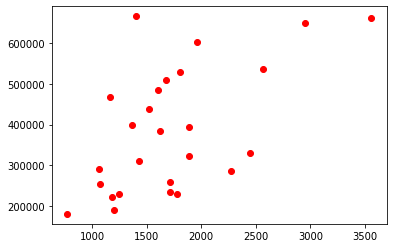

In [15]:
# ATENÇÃO: Não editar esta célula

# selecionando os preços e as áreas habitáveis do imóvel
Y = data[:,0] # Preço do imóvel
X = data[:,3] # Área habitável do imóvel

try:
    plt.plot(X, Y, 'ro');
except:
    pass

Conforme pudemos acompanhar durante a [aula](https://youtu.be/4qwuwMbsUZA?t=2262), para casos simples podemos calcular a regressão através de uma expressão analítica. Os coeficientes $\beta_1$ e $\beta_0$ podem ser calculados diretamente através das sequintes formulas:

$$\beta_1 =  \frac{\sum_{i=1}^{n} ( \textbf{x}_i - \hat{x})(\textbf{y}_i - \hat{y}) }{\sum_{i=1}^{n} ( \textbf{x}_i - \hat{x})^2} $$

$$\beta_0 =  \hat{y} - \beta_1 \hat{x} $$

**2.1** Calcule as médias dos valores de X e Y. Salve os valores obtidos nas variáveis **mu_x** e **mu_y**, respectivamente.

In [16]:
# Insira seu código aqui
mu_x = X.mean()
mu_y = Y.mean()
print(mu_x, mu_y)

1725.576923076923 387113.46153846156


**2.2** Calcule so valores de $\beta_1$ e de $\beta_0$. Salve o valor nas variáveis **b1** e **b0**, respectivamente.

In [17]:
# Insira seu código aqui
b1 = sum((X - mu_x) * (Y - mu_y)) / sum((X - mu_x) ** 2)
b0 = mu_y - b1 * mu_x
print(b1, b0)

140.3230551849408 144975.2357356781


Com os valores de $\beta_1$ e de $\beta_0$ calculados já temos a regressão linear definida. O resultado da regressão poderá ser vista no gráfico abaixo.


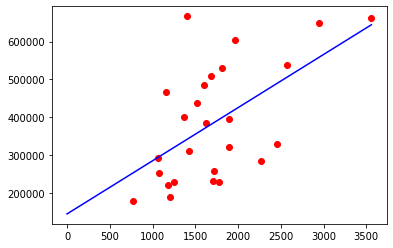

In [18]:
# ATENÇÃO: Não editar esta célula
x_line = np.linspace(0, max(X))
y_hat = b0 + b1 * x_line

try:
    plt.plot(X, Y, 'ro')
    plt.plot(x_line, y_hat, 'b')
except:
    pass

O que você acha? O preço do imóvel pode ser aproximado com precisão baseando-se apenas na área habitável do imóvel? 

### Questão 3 - Regressão Linear Múltipla

Como vimos na [aula](https://youtu.be/vYXuiGyjYoA?t=197), é razoavel supor que o preço de um imóvel não depende apenas de um fator, mas seria uma soma ponderada de vários fatores. Para isso usamos a regressão linear múltipla. A implementação detalhada desse algoritimo será objeto das próximas aulas, mas vamos experimentar a função do numpy que faz e avaliar a influência de alguns fatores.

In [19]:
# ATENÇÃO: Não editar esta célula
X = data[:,1:] #Conjunto de variáveis que compõe o X
b0_ones = np.ones((X.shape[0],1))
X = np.append(b0_ones, X, axis=1)
Y =  data[:,0]
print(X.shape)
print(Y.shape)

(26, 12)
(26,)


|    | price    | bedrooms | bathrooms | sqft_living | sqft_lot | floors | condition | grade | sqft_above | yr_built | sqft_living15 | sqft_lot15 |
|----|----------|----------|-----------|-------------|----------|--------|-----------|-------|------------|----------|---------------|------------|
| 0  | 221900.0 | 3        | 1.00      | 1180        | 5650     | 1.0    | 3         | 7     | 1180       | 1955     | 1340          | 5650       |
| 1  | 538000.0 | 3        | 2.25      | 2570        | 7242     | 2.0    | 3         | 7     | 2170       | 1951     | 1690          | 7639       |
| 2  | 180000.0 | 2        | 1.00      | 770         | 10000    | 1.0    | 3         | 6     | 770        | 1933     | 2720          | 8062       |
| 3  | 604000.0 | 4        | 3.00      | 1960        | 5000     | 1.0    | 5         | 7     | 1050       | 1965     | 1360          | 5000       |
| 4  | 510000.0 | 3        | 2.00      | 1680        | 8080     | 1.0    | 3         | 8     | 1680       | 1987     | 1800          | 7503       |
| 6  | 257500.0 | 3        | 2.25      | 1715        | 6819     | 2.0    | 3         | 7     | 1715       | 1995     | 2238          | 6819       |
| 7  | 291850.0 | 3        | 1.50      | 1060        | 9711     | 1.0    | 3         | 7     | 1060       | 1963     | 1650          | 9711       |
| 8  | 229500.0 | 3        | 1.00      | 1780        | 7470     | 1.0    | 3         | 7     | 1050       | 1960     | 1780          | 8113       |
| 9  | 323000.0 | 3        | 2.50      | 1890        | 6560     | 2.0    | 3         | 7     | 1890       | 2003     | 2390          | 7570       |
| 10 | 662500.0 | 3        | 2.50      | 3560        | 9796     | 1.0    | 3         | 8     | 1860       | 1965     | 2210          | 8925       |
| 11 | 468000.0 | 2        | 1.00      | 1160        | 6000     | 1.0    | 4         | 7     | 860        | 1942     | 1330          | 6000       |
| 12 | 310000.0 | 3        | 1.00      | 1430        | 19901    | 1.5    | 4         | 7     | 1430       | 1927     | 1780          | 12697      |
| 13 | 400000.0 | 3        | 1.75      | 1370        | 9680     | 1.0    | 4         | 7     | 1370       | 1977     | 1370          | 10208      |
| 14 | 530000.0 | 5        | 2.00      | 1810        | 4850     | 1.5    | 3         | 7     | 1810       | 1900     | 1360          | 4850       |
| 15 | 650000.0 | 4        | 3.00      | 2950        | 5000     | 2.0    | 3         | 9     | 1980       | 1979     | 2140          | 4000       |
| 16 | 395000.0 | 3        | 2.00      | 1890        | 14040    | 2.0    | 3         | 7     | 1890       | 1994     | 1890          | 14018      |
| 17 | 485000.0 | 4        | 1.00      | 1600        | 4300     | 1.5    | 4         | 7     | 1600       | 1916     | 1610          | 4300       |
| 18 | 189000.0 | 2        | 1.00      | 1200        | 9850     | 1.0    | 4         | 7     | 1200       | 1921     | 1060          | 5095       |
| 19 | 230000.0 | 3        | 1.00      | 1250        | 9774     | 1.0    | 4         | 7     | 1250       | 1969     | 1280          | 8850       |
| 20 | 385000.0 | 4        | 1.75      | 1620        | 4980     | 1.0    | 4         | 7     | 860        | 1947     | 1400          | 4980       |
| 22 | 285000.0 | 5        | 2.50      | 2270        | 6300     | 2.0    | 3         | 8     | 2270       | 1995     | 2240          | 7005       |
| 23 | 252700.0 | 2        | 1.50      | 1070        | 9643     | 1.0    | 3         | 7     | 1070       | 1985     | 1220          | 8386       |
| 24 | 329000.0 | 3        | 2.25      | 2450        | 6500     | 2.0    | 4         | 8     | 2450       | 1985     | 2200          | 6865       |
| 25 | 233000.0 | 3        | 2.00      | 1710        | 4697     | 1.5    | 5         | 6     | 1710       | 1941     | 1030          | 4705       |
| 27 | 667000.0 | 3        | 1.00      | 1400        | 1581     | 1.5    | 5         | 8     | 1400       | 1909     | 1860          | 3861       |
| 28 | 438000.0 | 3        | 1.75      | 1520        | 6380     | 1.0    | 3         | 7     | 790        | 1948     | 1520          | 6235       |

**3.1** Vamos então calcular os pesos da soma ponderada de cada fator da tabela de preços dos imóveis. Para isso, por enquanto, utilizaremos a função **np.linalg.lstsq** [(doc)](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html) do numpy. Esta função recebe a tabela de dados X e os valores dos preços dos imóveis. Os valores dos pesos deverão ser salvos na variável **vector_b**.

In [20]:
# Insira seu código aqui
vector_b = np.linalg.lstsq(X, Y, rcond = -1)[0]
print(vector_b.shape)
print(vector_b)

(12,)
[ 9.13909817e+06 -4.25983834e+04  1.90650348e+05  2.81368656e+01
 -3.82301141e+01  2.02712677e+04  1.66968897e+04  1.74711542e+05
 -1.13105428e+02 -5.26384748e+03 -2.85939556e+01  6.58660650e+01]


**3.2** Por fim, vamos estimar o preço de um imóvel segundo nosso modelo. Para isso devemos fazer a multiplicação do vetor de atributos de um imóvel pelo vetor de pesos obtidos pela regressão linear. A formula é a seguinte: 

$$y_i =  \textbf{X}_i  \textbf{b} $$

Aplique a formula acima e obtenha as estimativas dos preços dos imóveis com indices 0, 1 e 2. Salve nas variáveis **preco_0**, **preco_1** e **preco_2** respectivamente.

In [21]:
# Insira seu código aqui
preco_0 = X[0,:] @ vector_b
preco_1 = X[1,:] @ vector_b
preco_2 = X[2,:] @ vector_b
print(preco_0)
print(preco_1)
print(preco_2)

222038.5941960296
488951.4341038756
193675.484633142
